# II. 🔎 Exploratory Data Analysis

#### Importing essential librairies

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

color = sns.color_palette()
sns.set_style('darkgrid')

#### Importing the data 

In [131]:
df = pd.read_csv("../data/processed/glassdoor-data-engineer-cleaned.csv")
df.head()

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,job_simp,seniority,job_languages,job_cloud,job_viz,job_databases,job_bigdata,job_devops,job_education,job_experience
0,PCS Global Tech,4.7,"Riverside, CA",Data Engineer | PAID BOOTCAMP,Responsibilities\r\n· Analyze and organize raw...,70000,501 to 1000 Employees,Company - Private,Information Technology,Information Technology Support Services,...,data engineer,na,"['python', 'java', 'sql']",[],[],[],[],[],NaN,0-2 years
1,Futuretech Consultants LLC,3.9,"Newton, MS",Snowflake Data Engineer,My name is Dileep and I am a recruiter at Futu...,76500,NaN,NaN,NaN,NaN,...,data engineer,na,['sql'],['snowflake'],['ssis'],['snowflake'],[],[],bachelor,2-5 years
2,Clairvoyant,4.4,Remote,Data Engineer (MDM),Required Skills:\r\nMust have 5-8+ Years of ex...,121500,51 to 200 Employees,Company - Private,Pharmaceutical & Biotechnology,Biotech & Pharmaceuticals,...,data engineer,na,"['sql', 'python']","['aws', 'databricks']",[],[],['spark'],[],master,0-2 years
3,Apple,4.2,"Cupertino, CA",Data Engineer,"Summary\r\nPosted: Dec 22, 2021\r\nWeekly Hour...",115173,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,...,data engineer,na,['python'],[],['tableau'],[],[],[],NaN,NaN
4,Skytech Consultancy Services,5.0,"Baltimore, MD",Data Engineer,Description of Work:\r\nTechnical experience i...,117000,1 to 50 Employees,Company - Public,NaN,NaN,...,data engineer,na,['sql'],[],['tableau'],['oracle'],[],[],bachelor,5-10 years


In [132]:
cols = ['job_languages', 'job_cloud', 'job_viz', 'job_databases', 'job_bigdata', 'job_devops']

def safe_eval(x):
    try:
        return eval(x)
    except:
        return x

df[cols] = df[cols].astype(str).applymap(safe_eval)

### 📊 Visualizing the most in demande tools for Data Engineers

In [133]:
prog_languages = ['python', 'java', 'scala', 'go', 'r', 'c++', 'c#', 'sql', 'nosql', 'rust', 'shell']
cloud_tools = ['aws', 'azure', 'gcp', 'snowflake', 'databricks', 'redshift']
viz_tools = ['power bi', 'tableau', 'excel', 'ssis', 'qlik', 'sap', 'looker']
databases = ['sql server', 'postgresql', 'mongodb', 'mysql', 'oracle', 'casandra', 'elasticsearch', 'dynamodb', 'snowflake', 'redis', 'neo4j', 'hive', 'dbt']
big_data = ['spark', 'hadoop', 'kafka', 'flink']
devops = ['gitlab', 'terraform', 'docker', 'bash', 'ansible']

In [134]:
def filtered_keywords(tools, keywords, title, head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(tools.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')
    
    # get frequency of occurrence of word (as word only appears once per line)
    length = len(tools) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = sns.barplot(x="keywords", y="percentage", data=count_keywords, palette="deep")
    plt.xlabel("")
    plt.ylabel("Likelihood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

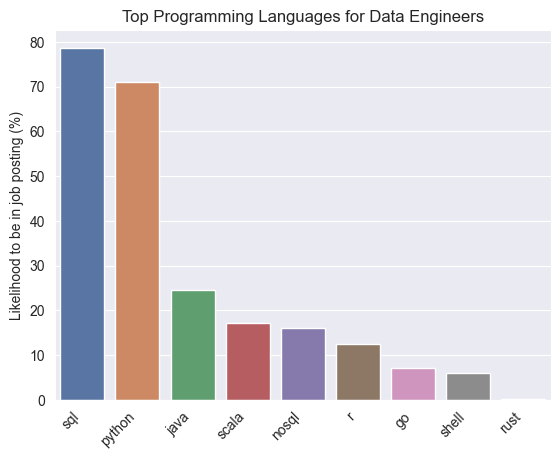

  keywords  counts  percentage
0      sql     838   78.685446
1   python     756   70.985915
2     java     262   24.600939
3    scala     182   17.089202
4    nosql     172   16.150235
5        r     133   12.488263
6       go      75    7.042254
7    shell      63    5.915493
8     rust       3    0.281690


In [135]:
filtered_keywords(df['job_languages'], prog_languages, title="Top Programming Languages for Data Engineers")

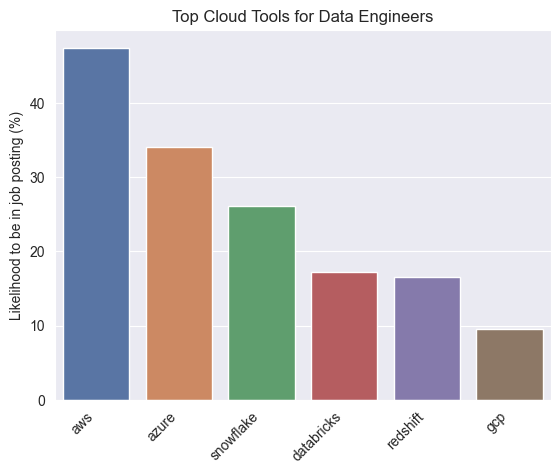

     keywords  counts  percentage
0         aws     506   47.511737
1       azure     363   34.084507
2   snowflake     278   26.103286
3  databricks     184   17.276995
4    redshift     176   16.525822
5         gcp     102    9.577465


In [136]:
filtered_keywords(df['job_cloud'], cloud_tools, title="Top Cloud Tools for Data Engineers")

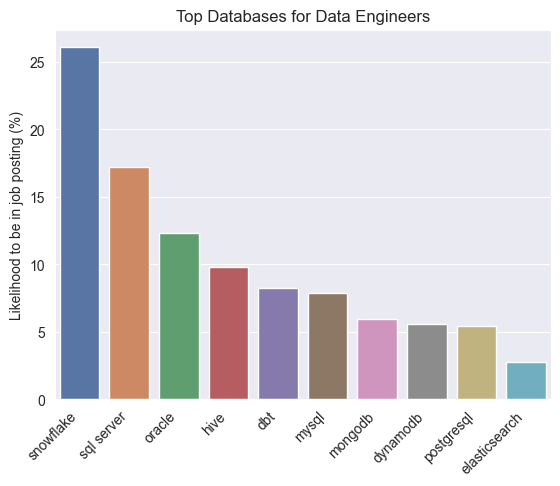

        keywords  counts  percentage
0      snowflake     278   26.103286
1     sql server     183   17.183099
2         oracle     131   12.300469
3           hive     104    9.765258
4            dbt      88    8.262911
5          mysql      84    7.887324
6        mongodb      63    5.915493
7       dynamodb      59    5.539906
8     postgresql      58    5.446009
9  elasticsearch      29    2.723005


In [137]:
filtered_keywords(df['job_databases'], databases, title="Top Databases for Data Engineers")

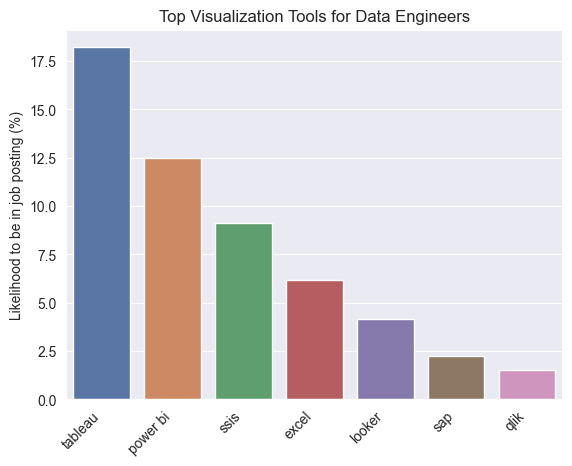

   keywords  counts  percentage
0   tableau     194   18.215962
1  power bi     133   12.488263
2      ssis      97    9.107981
3     excel      66    6.197183
4    looker      44    4.131455
5       sap      24    2.253521
6      qlik      16    1.502347


In [138]:
filtered_keywords(df['job_viz'], viz_tools, title="Top Visualization Tools for Data Engineers")

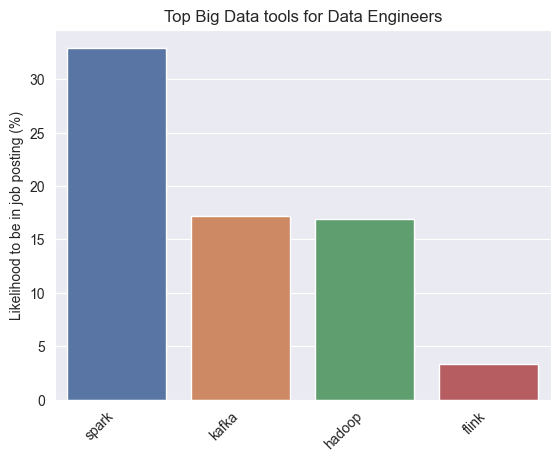

  keywords  counts  percentage
0    spark     351   32.957746
1    kafka     183   17.183099
2   hadoop     180   16.901408
3    flink      35    3.286385


In [139]:
filtered_keywords(df['job_bigdata'], big_data, title="Top Big Data tools for Data Engineers")

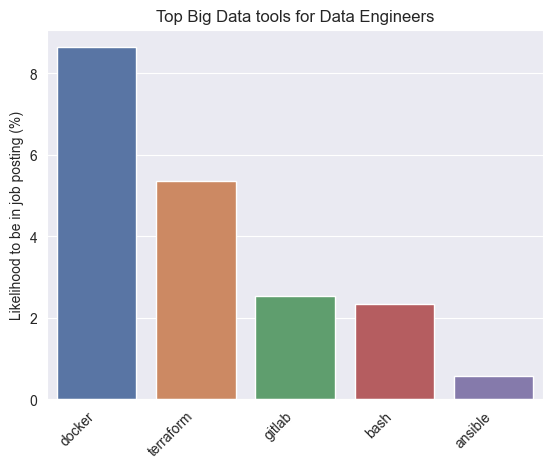

    keywords  counts  percentage
0     docker      92    8.638498
1  terraform      57    5.352113
2     gitlab      27    2.535211
3       bash      25    2.347418
4    ansible       6    0.563380


In [140]:
filtered_keywords(df['job_devops'], devops, title="Top Big Data tools for Data Engineers")

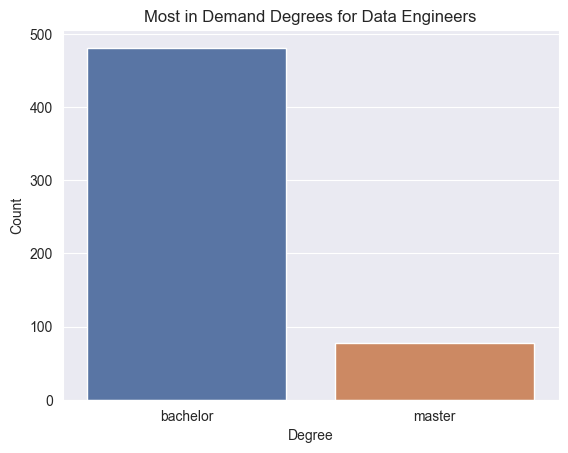

In [141]:
sns.countplot(data=df, x='job_education', palette="deep")

plt.title('Most in Demand Degrees for Data Engineers')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

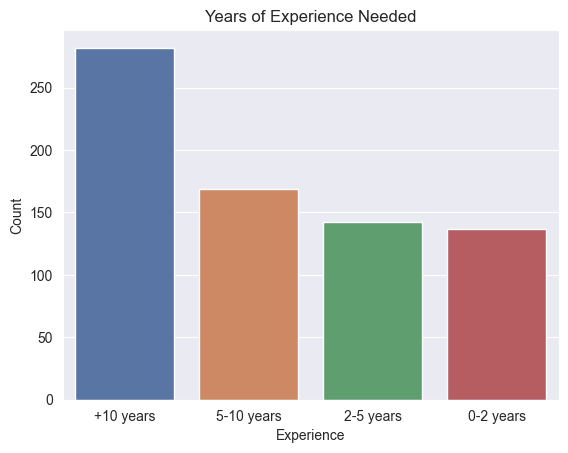

In [142]:
sns.countplot(data=df, x='job_experience', palette="deep", order = df['job_experience'].value_counts().index)

plt.title('Years of Experience Needed')
plt.xlabel('Experience')
plt.ylabel('Count')

plt.show()

Companies that are recruiting Data Engineers the most in Glassdoor

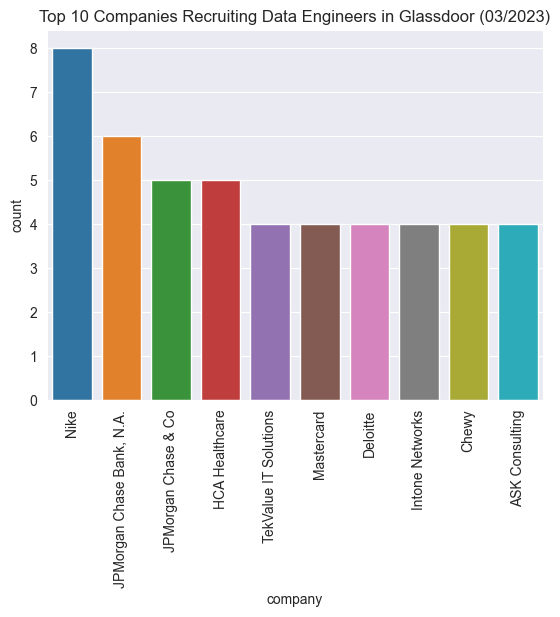

In [143]:
top10 = df['company'].value_counts().head(10)
sns.countplot(x='company', order=top10.index, data=df)
plt.title("Top 10 Companies Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xticks(rotation=90)
plt.show()

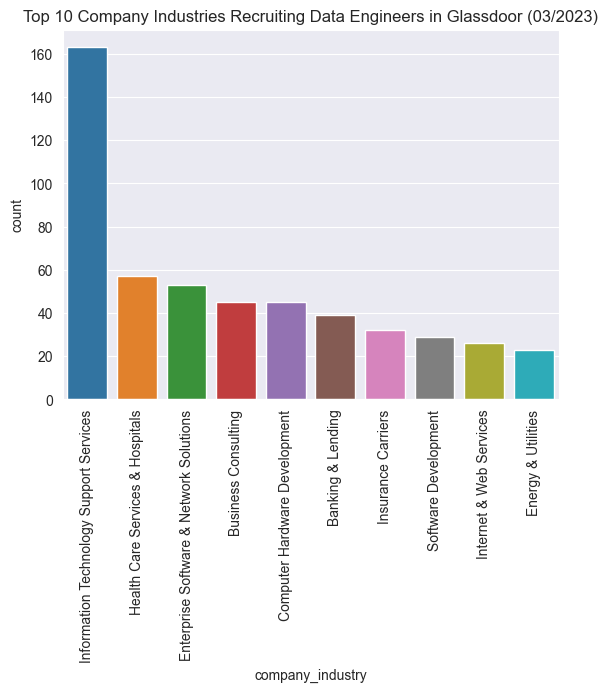

In [144]:
top10 = df['company_industry'].value_counts().head(10)
sns.countplot(x='company_industry', order=top10.index, data=df)
plt.title("Top 10 Company Industries Recruiting Data Engineers in Glassdoor (03/2023)")
plt.xticks(rotation=90)
plt.show()

### 💸 Data Engineer salary in United States

How much does a Data Engineer make in the United States?

In [169]:
avg_salary = df['salary_estimate'].mean()
print(f"Average base salary : ${round(avg_salary):,} per year")

Average base salary : $112,097 per year


In [170]:
min_salary = df['salary_estimate'].min()
max_salary = df['salary_estimate'].max()

print(f"Lowest salary : ${round(min_salary)} -- Highest salary : ${round(max_salary)}")

Lowest salary : $48600 -- Highest salary : $175000


Salary estimate distribution

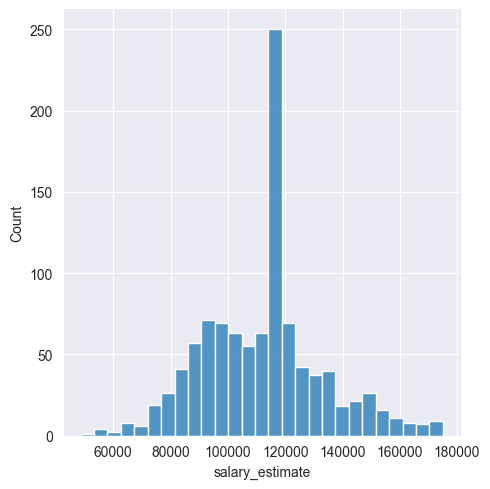

In [171]:
sns.displot(df['salary_estimate'])

<Axes: xlabel='company_rating', ylabel='Count'>

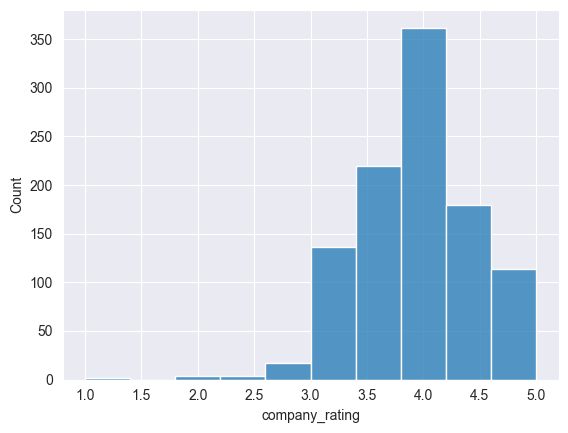

In [172]:
sns.histplot(df['company_rating'], bins=10)

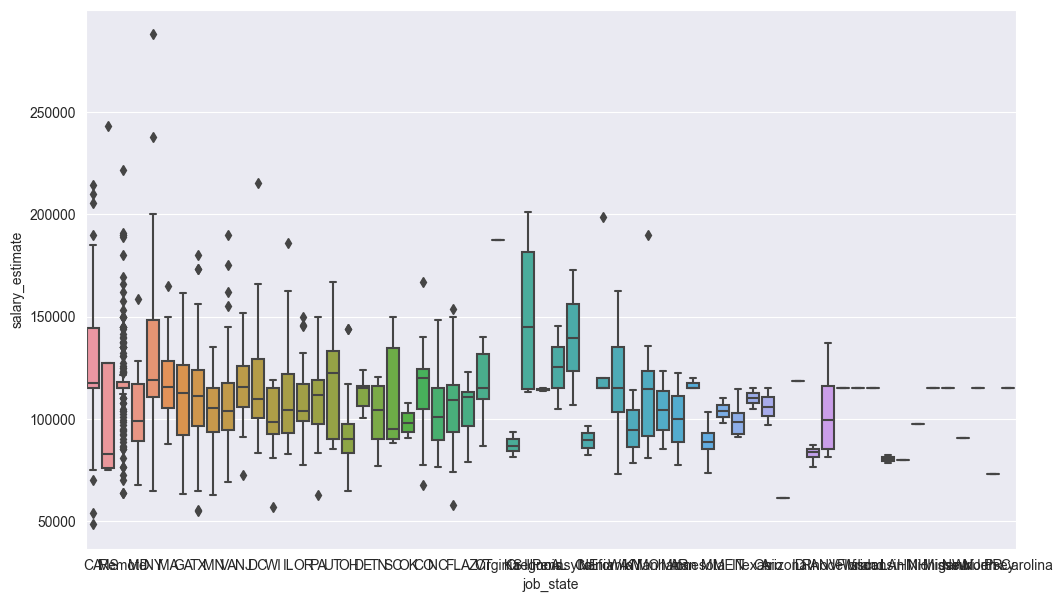

In [149]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate')
plt.show()

Getting rid of the outliers

In [150]:
df = df[df['salary_estimate'] <= 175000]

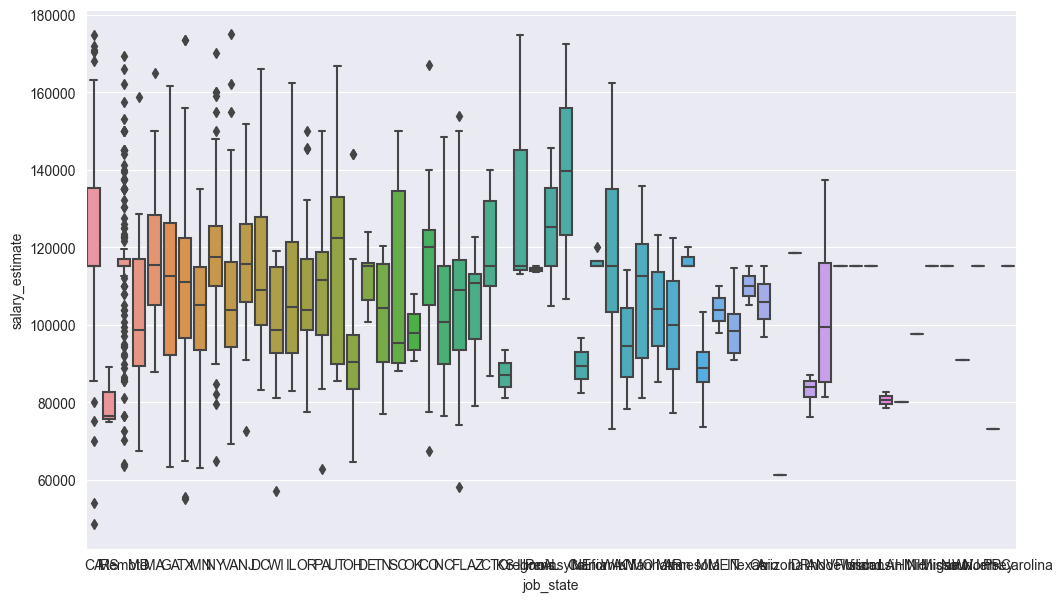

In [151]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))

sns.boxplot(data=df, x='job_state', y='salary_estimate')
plt.show()

In [152]:
df_cat = df[['job_state', 'seniority', 'company_revenue', 'company_age', 'company_industry', 'company_sector', 'company_type', 'company_size']]

graph for job_state: total = 61


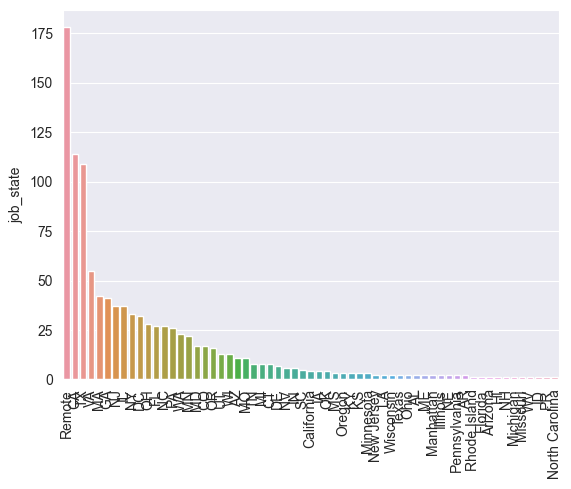

graph for seniority: total = 2


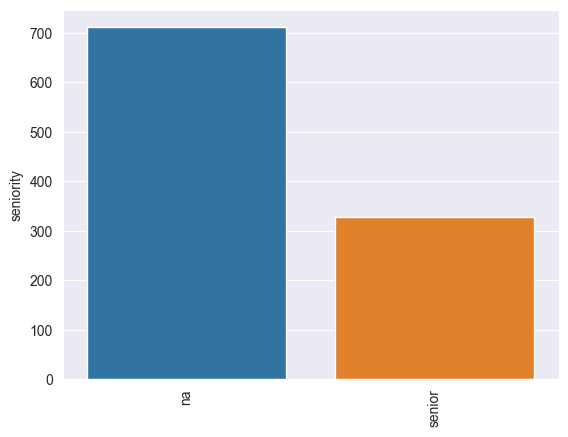

graph for company_revenue: total = 10


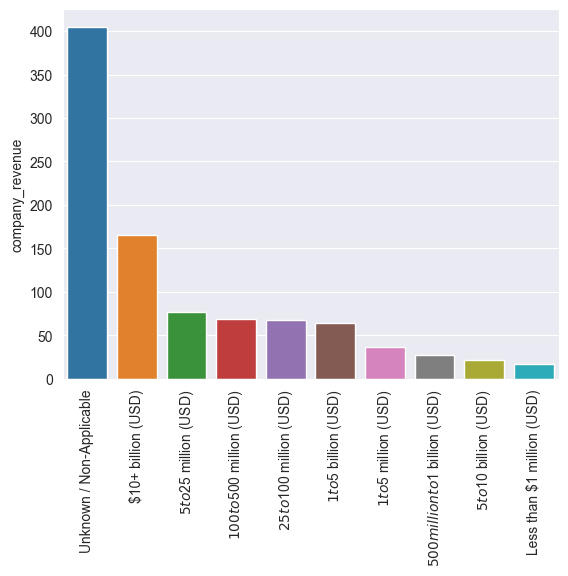

graph for company_age: total = 146


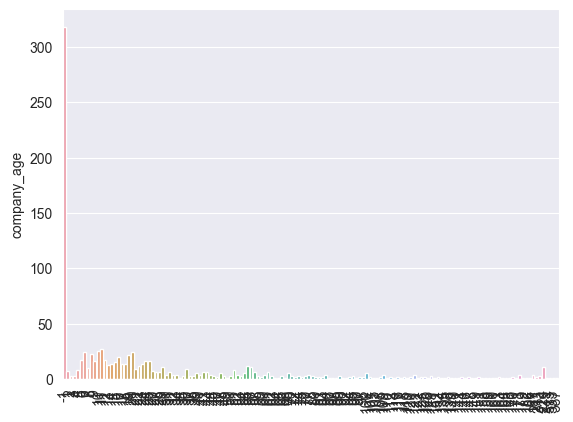

graph for company_industry: total = 79


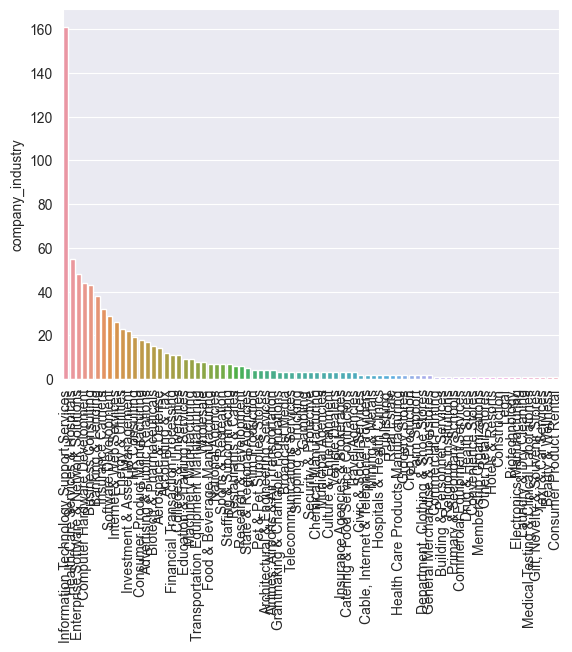

graph for company_sector: total = 25


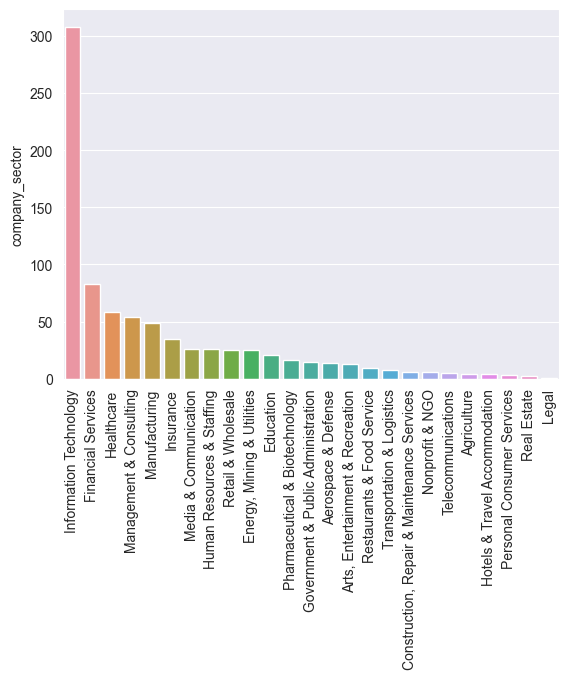

graph for company_type: total = 11


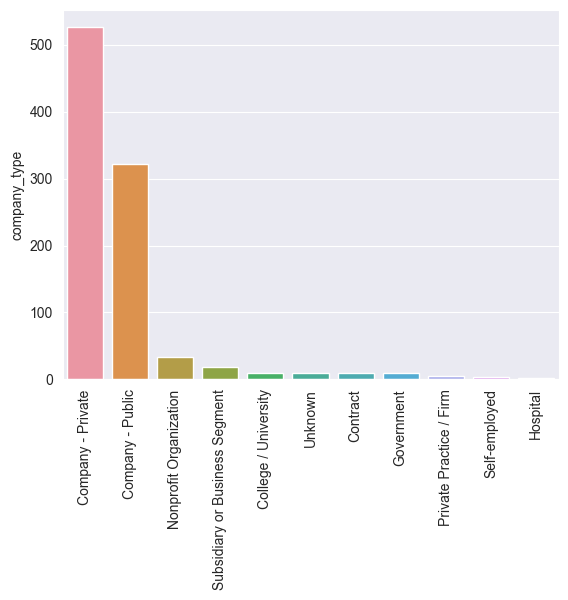

graph for company_size: total = 8


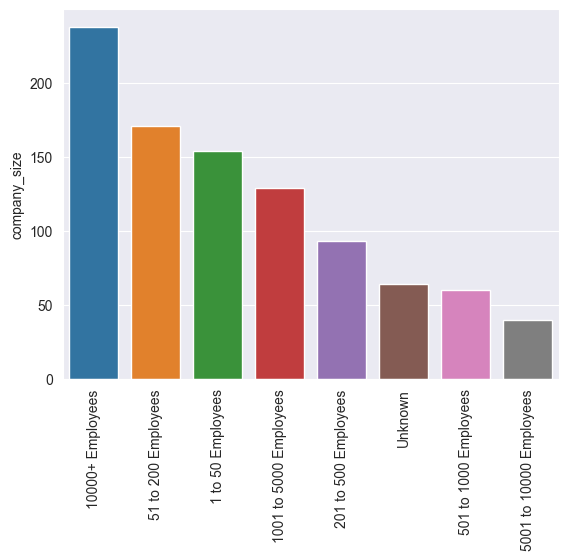

In [153]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Correlation Matrix

<Axes: >

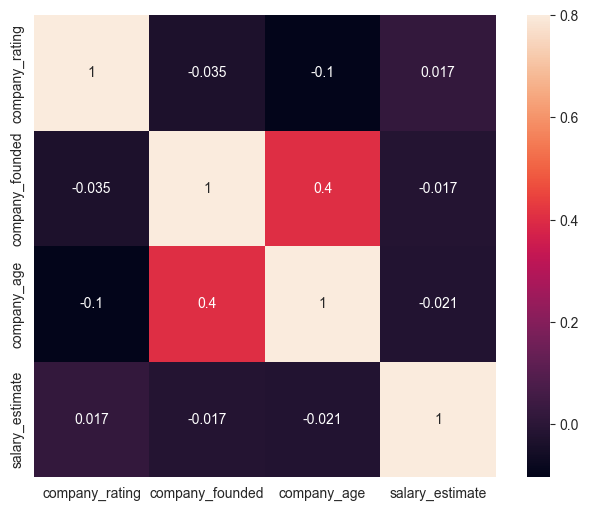

In [154]:
corrmat = df[['company_rating', 'company_founded', 'company_age', 'salary_estimate']].corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=True)

Let's see how the salary estimate changes based on different features

In [155]:
pd.pivot_table(df, index = 'job_education', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_education,
master,114435.09
bachelor,110658.52


Data Engineers with a Master's Degree get paid more

In [156]:
pd.pivot_table(df, index = 'seniority', values = 'salary_estimate').applymap('{:.2f}'.format)

,salary_estimate
seniority,
na,107741.40
senior,121538.13


Senior Data Engineers get paid more

In [157]:
pd.pivot_table(df, index = 'job_state', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
job_state,
Pennsylvania,139600.00
Oregon,134369.00
AL,125208.00
CA,123457.29
NY,120200.48
...,...
LA,80569.50
MS,80182.33
HI,80014.00


In [158]:
pd.pivot_table(df, index = 'job_state', values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,salary_estimate
job_state,
Remote,178
CA,114
TX,109
VA,55
MA,42
...,...
Rhode Island,1
Missouri,1
PR,1


CO state have the highest salary estimate but we only have 1 estimate, so we can't take that salary reliably that's why in the model building phase we are gonna drop states with less than 15 record.

In [159]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_industry,
Film Production,148737.00
Building & Personnel Services,145000.00
Travel Agencies,136724.33
Hospitals & Health Clinics,135000.00
Grantmaking & Charitable Foundations,133674.33
...,...
Architectural & Engineering Services,83901.75
Commercial Printing,82914.00
Mining & Metals,80500.00


In [160]:
pd.pivot_table(df, index = 'company_industry', values = 'salary_estimate', aggfunc = 'count').sort_values('salary_estimate', ascending = False)

,salary_estimate
company_industry,
Information Technology Support Services,161
Health Care Services & Hospitals,55
Enterprise Software & Network Solutions,48
Computer Hardware Development,44
Business Consulting,43
...,...
Legal,1
Beauty & Wellness,1
Medical Testing & Clinical Laboratories,1


In [161]:
pd.pivot_table(df, index = 'company_size', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_size,
10000+ Employees,114180.79
Unknown,113274.27
1 to 50 Employees,112782.01
501 to 1000 Employees,112237.60
51 to 200 Employees,111038.96
5001 to 10000 Employees,110887.27
201 to 500 Employees,110250.13
1001 to 5000 Employees,109024.73


In [162]:
pd.pivot_table(df, index = 'company_revenue', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_revenue,
$1 to $5 billion (USD),115268.70
$10+ billion (USD),114320.47
$100 to $500 million (USD),113585.88
Less than $1 million (USD),112844.35
Unknown / Non-Applicable,112204.28
$1 to $5 million (USD),111421.14
$500 million to $1 billion (USD),108176.59
$25 to $100 million (USD),108082.90
$5 to $25 million (USD),107926.31


In [163]:
pd.pivot_table(df, index = 'company_type', values = 'salary_estimate').sort_values('salary_estimate', ascending = False).applymap('{:.2f}'.format)

,salary_estimate
company_type,
Self-employed,142500.00
Company - Public,114966.02
Company - Private,111479.12
College / University,107994.10
Subsidiary or Business Segment,107037.95
Private Practice / Firm,107009.20
Government,106789.44
Nonprofit Organization,103483.24
Unknown,101553.00


Let's build a wordcloud to show relative importance of the words in the job description

In [164]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [165]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

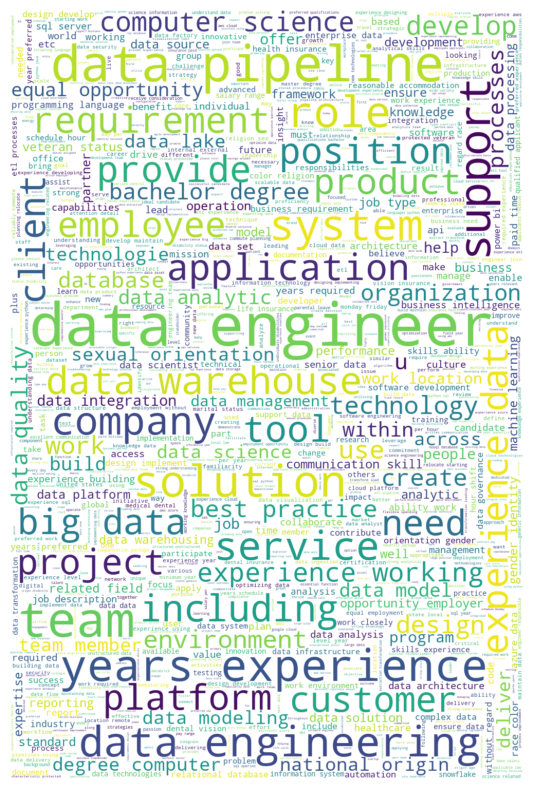

In [166]:
words = " ".join(df['job_description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 1000, width=1000, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [173]:
data_path = '../data/processed/'

df.to_csv(data_path + "glassdoor-data-engineer-eda.csv", index=False)